### Libraries and Data load

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from scipy import stats

# Load the merged dataset from the first script
merged_df = pd.read_csv("../0_DataPreparation/merged_output.csv")

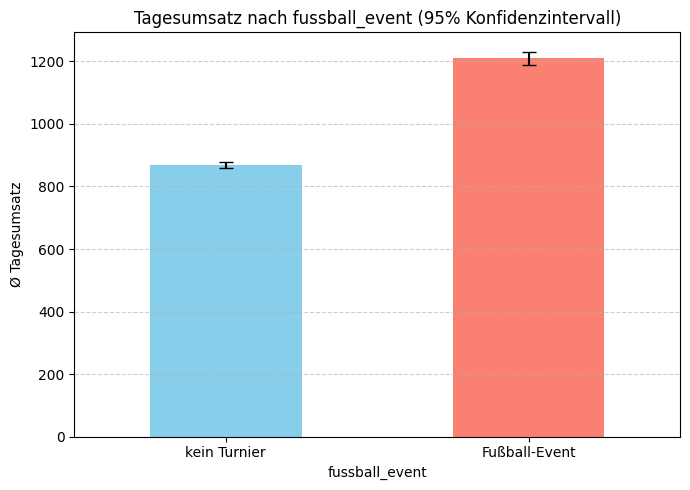

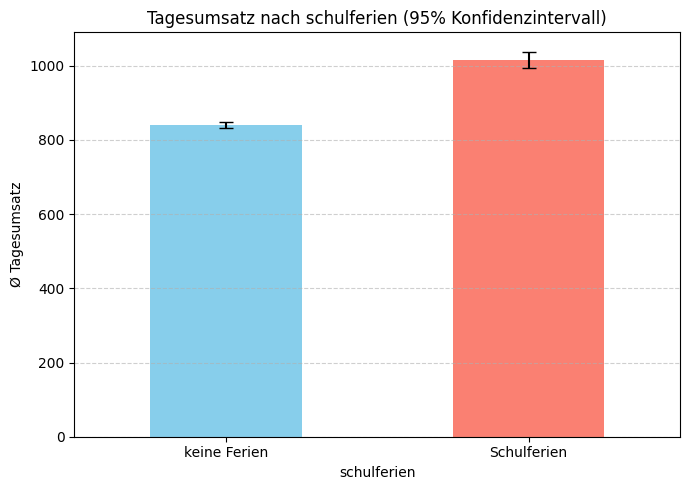

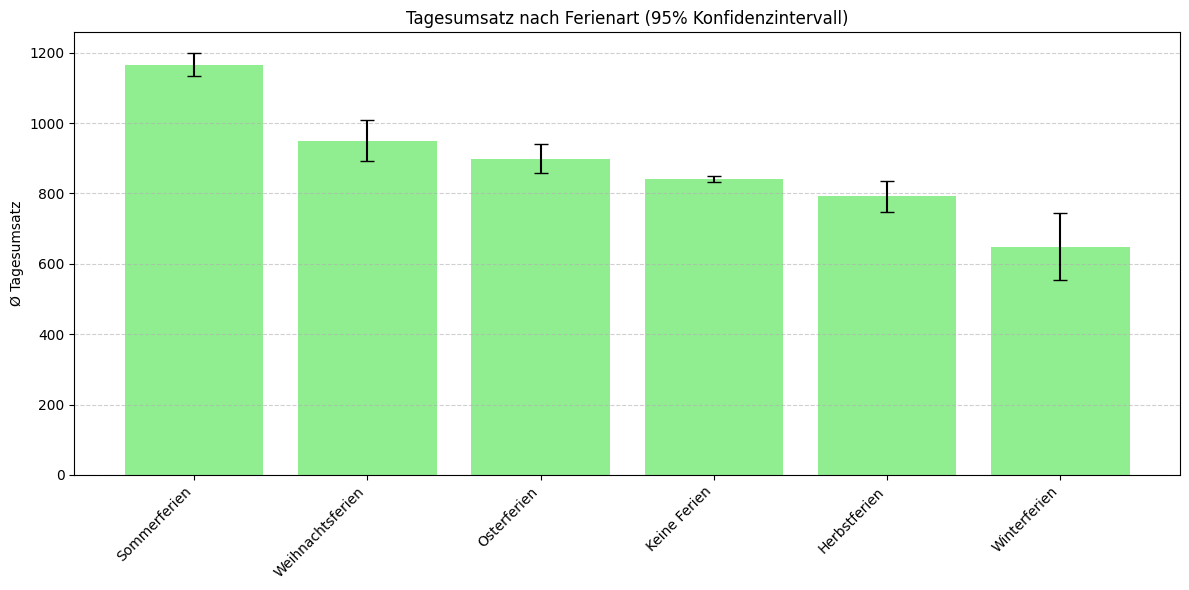

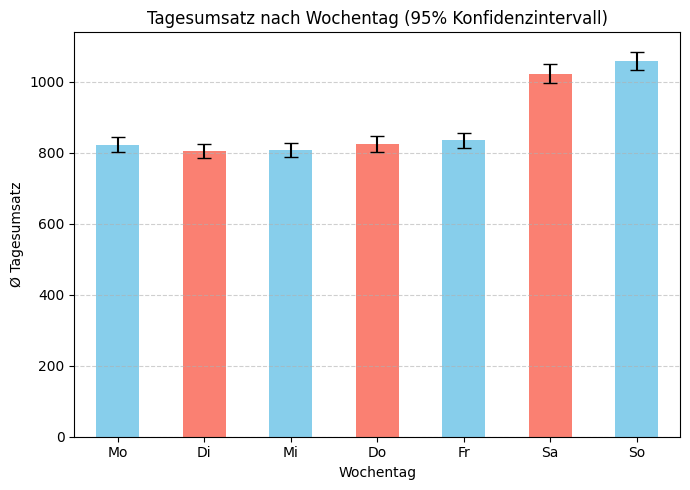

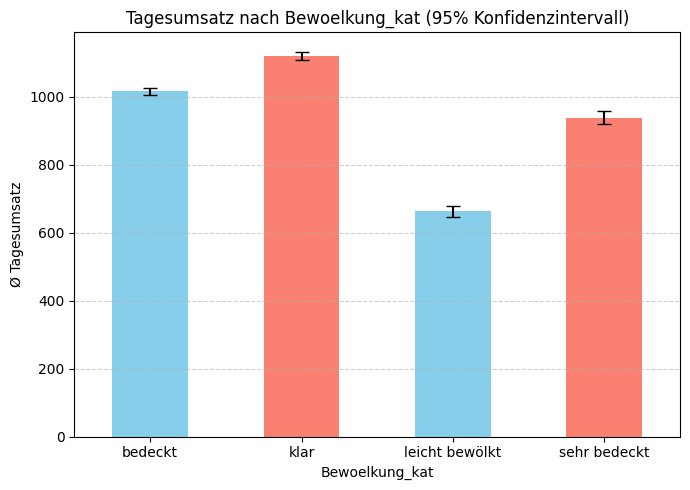

/tmp/ipykernel_21499/1559388727.py:73: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gruppen = merged_df.groupby(["Wochentag_label", "Warengruppe_label"])["Umsatz"]


<Figure size 1200x600 with 0 Axes>

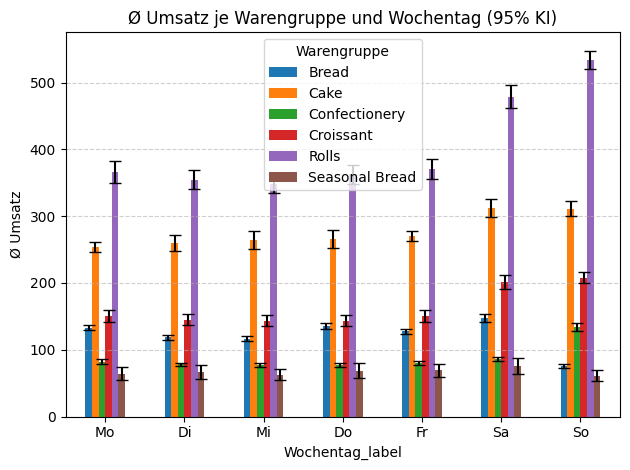

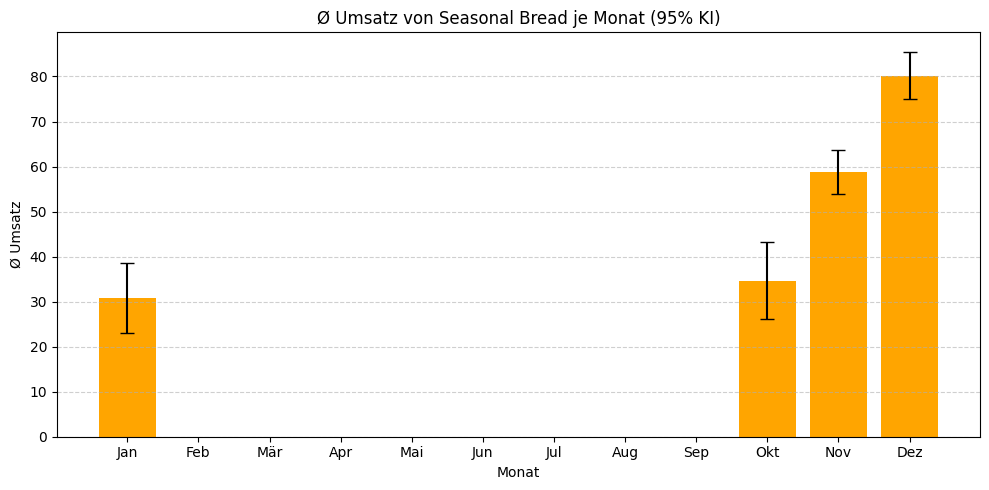

In [ ]:
def plot_balkendiagramm_mit_ki(df, var_name, label_map):
    gruppen = df.groupby(var_name)["sales_daily"]
    mittelwerte = gruppen.mean()
    standardfehler = gruppen.sem()
    konfidenz = standardfehler * stats.t.ppf(0.975, gruppen.count() - 1)

    plt.figure(figsize=(7, 5))
    mittelwerte.plot(kind="bar", yerr=konfidenz, capsize=5, color=["skyblue", "salmon"])
    plt.xticks(ticks=range(len(mittelwerte)), labels=[label_map[i] for i in mittelwerte.index], rotation=0)
    plt.ylabel("Ø Tagesumsatz")
    plt.title(f"Tagesumsatz nach {var_name} (95% Konfidenzintervall)")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

def plot_ferienvergleich(df, kategorien_col, wert_col="sales_daily"):
    gruppen = df.groupby(kategorien_col)[wert_col]
    mittelwerte = gruppen.mean()
    standardfehler = gruppen.sem()
    konfidenz = standardfehler * stats.t.ppf(0.975, gruppen.count() - 1)

    # Sortieren nach Mittelwert
    sort_idx = mittelwerte.sort_values(ascending=False).index
    mittelwerte = mittelwerte.loc[sort_idx]
    konfidenz = konfidenz.loc[sort_idx]

    # Plot
    plt.figure(figsize=(12, 6))
    plt.bar(mittelwerte.index, mittelwerte.values, yerr=konfidenz, capsize=5, color="lightgreen")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Ø Tagesumsatz")
    plt.title("Tagesumsatz nach Ferienart (95% Konfidenzintervall)")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Plot 1: Fußball-Events
plot_balkendiagramm_mit_ki(merged_df, "fussball_event", {0: "kein Turnier", 1: "Fußball-Event"})

# Plot 2: Schulferien
plot_balkendiagramm_mit_ki(merged_df, "schulferien", {0: "keine Ferien", 1: "Schulferien"})

# Plot für Ferienarten
plot_ferienvergleich(merged_df, kategorien_col="ferientyp")

# Plot 3: Wochentage
plot_balkendiagramm_mit_ki(merged_df, "Wochentag", {0: "Mo", 1: "Di", 2: "Mi", 3: "Do", 4: "Fr", 5: "Sa", 6: "So"})

# Plot 4: Bewölkung
plot_balkendiagramm_mit_ki(merged_df, "Bewoelkung_kat", {"klar": "klar", "leicht bewölkt": "leicht bewölkt", "bedeckt": "bedeckt", "sehr bedeckt": "sehr bedeckt"})

# Mapping für Wochentage und Warengruppen
wochentag_map = {0: "Mo", 1: "Di", 2: "Mi", 3: "Do", 4: "Fr", 5: "Sa", 6: "So"}
wochentag_order = ["Mo", "Di", "Mi", "Do", "Fr", "Sa", "So"]
warengruppe_map = {1: "Bread", 2: "Rolls", 3: "Croissant", 4: "Confectionery", 5: "Cake", 6: "Seasonal Bread"}
merged_df["Wochentag_label"] = pd.Categorical(merged_df["Wochentag"].map(wochentag_map), categories=wochentag_order, ordered=True)
merged_df["Warengruppe_label"] = merged_df["Warengruppe"].map(warengruppe_map)

# Gruppieren
gruppen = merged_df.groupby(["Wochentag_label", "Warengruppe_label"])["Umsatz"]
mittelwerte = gruppen.mean().unstack()
standardfehler = gruppen.sem().unstack()
konfidenz = standardfehler * stats.t.ppf(0.975, gruppen.count().unstack().fillna(1) - 1)

# Plot
plt.figure(figsize=(12, 6))
mittelwerte.plot(kind="bar", yerr=konfidenz, capsize=4)
plt.ylabel("Ø Umsatz")
plt.title("Ø Umsatz je Warengruppe und Wochentag (95% KI)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title="Warengruppe")
plt.show()

# Monatsnamen (für Achsenbeschriftung)
monatsnamen = ["Jan", "Feb", "Mär", "Apr", "Mai", "Jun", 
               "Jul", "Aug", "Sep", "Okt", "Nov", "Dez"]

# Sicherstellen, dass Datum ein datetime ist
merged_df["Datum"] = pd.to_datetime(merged_df["Datum"])

# Filter: nur Warengruppe 6 (Seasonal Bread)
seasonal_df = merged_df[merged_df["Warengruppe"] == 6].copy()
seasonal_df["Monat"] = seasonal_df["Datum"].dt.month

# Gruppierung nach Monat
gruppen = seasonal_df.groupby("Monat")["Umsatz"]
mittelwerte = gruppen.mean()
standardfehler = gruppen.sem()
konfidenz = standardfehler * stats.t.ppf(0.975, gruppen.count() - 1)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(mittelwerte.index, mittelwerte.values, yerr=konfidenz, capsize=5, color="orange")
plt.xticks(ticks=range(1, 13), labels=monatsnamen)
plt.xlabel("Monat")
plt.ylabel("Ø Umsatz")
plt.title("Ø Umsatz von Seasonal Bread je Monat (95% KI)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()